### Question 1

Find the differential kinematic equation of the (2-3-2) Euler angle set:

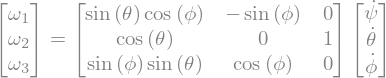

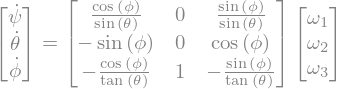

In [167]:
import sympy as sm
import numpy as np
from scipy.integrate import solve_ivp
from sympy.physics.mechanics import *
init_vprinting()

psi, theta, phi = dynamicsymbols('psi, theta, phi')   # Rotation angles for (3-2-1) set
w1, w2, w3 = dynamicsymbols('omega_1, omega_2, omega_3')   # Angular velocity vector components
t = sm.Symbol('t')
yaw_pitch_roll = sm.Matrix([psi, theta, phi])
yaw_pitch_roll_rates = sm.Matrix([psi, theta, phi]).diff(t)
omegas = sm.Matrix([w1, w2, w3])

N = ReferenceFrame('N', indices=('1', '2', '3'))
B = ReferenceFrame('B', indices=('1', '2', '3'))

B.orient_body_fixed(N, (psi, theta, phi), '232')
w_BN = B.ang_vel_in(N)

wA, wb = sm.linear_eq_to_matrix(w_BN.to_matrix(B), list(yaw_pitch_roll_rates.iter_values()))

# Display equation w = [C]*r
display(sm.Eq(omegas, sm.MatMul(wA, yaw_pitch_roll_rates, evaluate=False)))

wA_inv = sm.trigsimp(wA.inv())

# Display equation r = [C^-1]*w
display(sm.Eq(yaw_pitch_roll_rates, sm.MatMul(wA_inv, omegas, evaluate=False)))

### Question 2

The initial (3-2-1) Euler angles yaw, pitch and roll of a vehicle are (ψ,θ,ϕ) = (40, 30, 80) degrees. Assume the body angular velocity vector of the craft is given through the BB frame components as $B\omega=[sin⁡(0.1t), 0.01cos, ⁡(0.1t)]20$ deg/s.  Write a program to numerically integrate the yaw, pitch and roll angles over a simulation time of 1 minute.   Enter the Euler angle norm $\sqrt{ψ^2+θ^2+ϕ^2}$​ at the simulation time step 42s. Express angles in radians. Let the initial angles integrate, don't wrap them to any particular quadrants.

[Hint: if you are unsure, look at the "Optional Review: Integrating Differential Kinematic Equations" video.]

[Hint: In the integration, start with the initial angles and just integrate them without mapping them to specific quadrants. ]

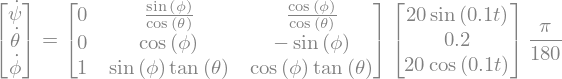

In [164]:
B.orient_body_fixed(N, (psi, theta, phi), '321')
w_BN = B.ang_vel_in(N)
wA, wb = sm.linear_eq_to_matrix(w_BN.to_matrix(B), list(yaw_pitch_roll_rates.iter_values()))
wA_inv = sm.trigsimp(wA.inv())

kdes = sm.MatMul(wA_inv,
                 omegas.subs({w1: 20*sm.sin(0.1*t),
                              w2: 20*0.01,
                              w3: 20*sm.cos(0.1*t)}), (sm.pi/180), evaluate=False)

display(sm.Eq(yaw_pitch_roll_rates, kdes, evaluate=False))

fun = sm.lambdify([t, (psi, theta, phi)], kdes.doit())
inits = np.radians([40, 30, 80])
vals = solve_ivp(fun, (0,60), inits, t_eval=[42], vectorized=True)

display(sm.Eq(sm.sqrt(psi**2 + theta**2 + phi**2), np.linalg.norm(vals.y)))